### Import Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from matplotlib.figure import Figure
from pylab import *

### Load The Data

In [3]:
df=pd.read_csv('./toyota.csv')
df

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,36.2,2.0
...,...,...,...,...,...,...,...,...
6733,IQ,2011,5500,Automatic,30000,Petrol,58.9,1.0
6734,Urban Cruiser,2011,4985,Manual,36154,Petrol,50.4,1.3
6735,Urban Cruiser,2012,4995,Manual,46000,Diesel,57.6,1.4
6736,Urban Cruiser,2011,3995,Manual,60700,Petrol,50.4,1.3


 ### Info About the Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   mpg           6738 non-null   float64
 7   engineSize    6738 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 421.3+ KB


In [5]:
df.describe

<bound method NDFrame.describe of               model  year  price transmission  mileage fuelType   mpg  \
0              GT86  2016  16000       Manual    24089   Petrol  36.2   
1              GT86  2017  15995       Manual    18615   Petrol  36.2   
2              GT86  2015  13998       Manual    27469   Petrol  36.2   
3              GT86  2017  18998       Manual    14736   Petrol  36.2   
4              GT86  2017  17498       Manual    36284   Petrol  36.2   
...             ...   ...    ...          ...      ...      ...   ...   
6733             IQ  2011   5500    Automatic    30000   Petrol  58.9   
6734  Urban Cruiser  2011   4985       Manual    36154   Petrol  50.4   
6735  Urban Cruiser  2012   4995       Manual    46000   Diesel  57.6   
6736  Urban Cruiser  2011   3995       Manual    60700   Petrol  50.4   
6737  Urban Cruiser  2011   4495       Manual    45128   Petrol  50.4   

      engineSize  
0            2.0  
1            2.0  
2            2.0  
3            

In [8]:
df.head(50)

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,36.2,2.0
5,GT86,2017,15998,Manual,26919,Petrol,36.2,2.0
6,GT86,2017,18522,Manual,10456,Petrol,36.2,2.0
7,GT86,2017,18995,Manual,12340,Petrol,36.2,2.0
8,GT86,2020,27998,Manual,516,Petrol,33.2,2.0
9,GT86,2016,13990,Manual,37999,Petrol,36.2,2.0


### What are the models available in Toyota?

In [8]:
df['model'].unique()

array(['GT86', 'Corolla', 'RAV4', 'Yaris', 'Auris', 'Aygo', 'C-HR',
       'Prius', 'Avensis', 'Verso', 'Hilux', 'PROACE VERSO',
       'Land Cruiser', 'Supra', 'Camry', 'Verso-S', 'IQ', 'Urban Cruiser'],
      dtype=object)

### Interprete data with graph for variables

### Histogram

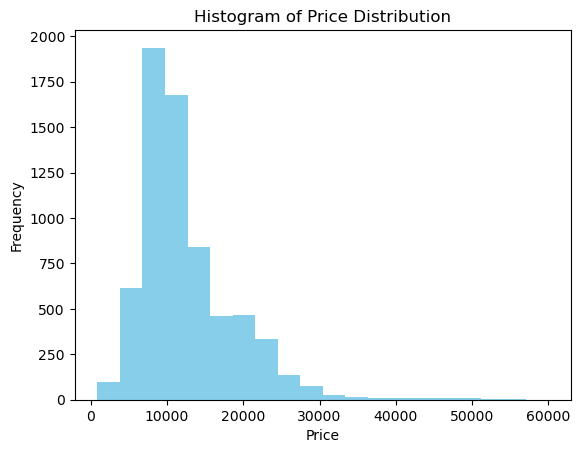

In [34]:
# Define the color you want for the bars
hist_color = 'skyblue'

# Create the histogram with the specified color
plt.hist(df['price'], bins=20, color=hist_color)

# Labeling
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price Distribution')

# Show the plot
plt.show()

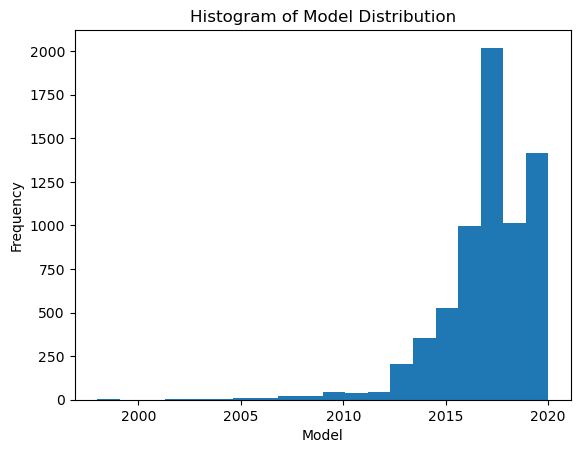

In [19]:
plt.hist(df['year'], bins=20)
plt.xlabel('Model')
plt.ylabel('Frequency')
plt.title('Histogram of Model Distribution')
plt.show()

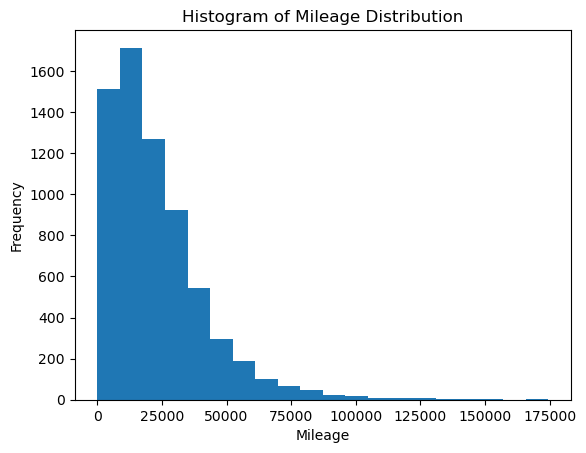

In [49]:
plt.hist(df['mileage'], bins=20)
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.title('Histogram of Mileage Distribution')
plt.show()

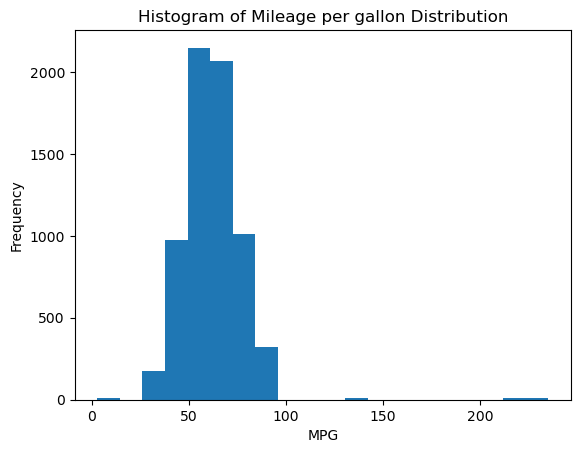

In [51]:
plt.hist(df['mpg'], bins=20)
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.title('Histogram of Mileage per gallon Distribution')
plt.show()

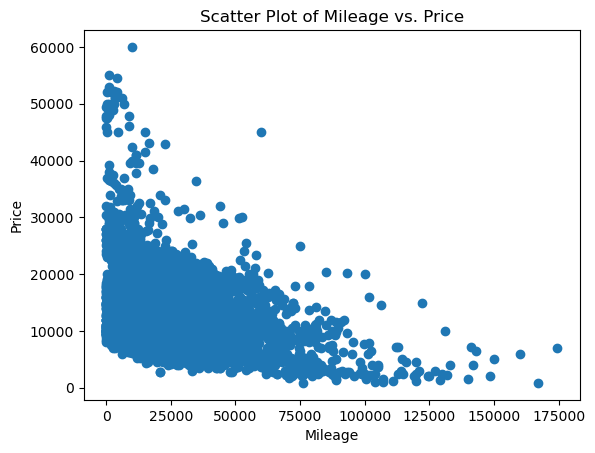

In [36]:
# Scatter plot

plt.scatter(df['mileage'], df['price'])
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Scatter Plot of Mileage vs. Price')
plt.show()

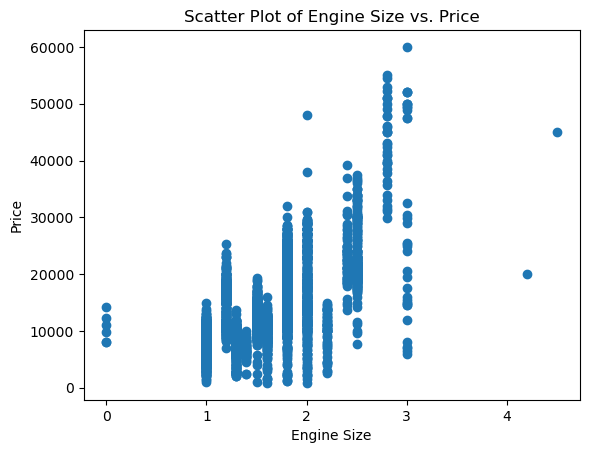

In [39]:
plt.scatter(df['engineSize'], df['price'])
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.title('Scatter Plot of Engine Size vs. Price')
plt.show()

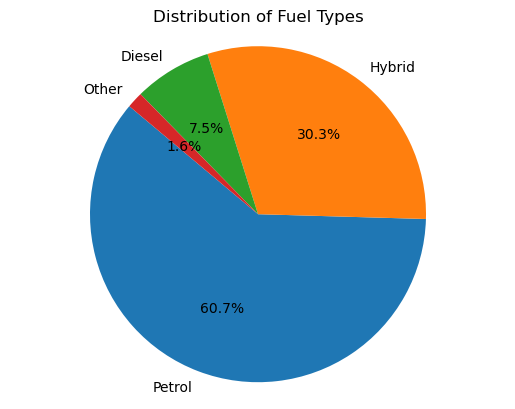

In [48]:
# Pie chart

fuel_type_counts = df['fuelType'].value_counts()
plt.pie(fuel_type_counts, labels=fuel_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Fuel Types')
plt.show()

### Checking Null values

In [7]:
df.isnull()

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
6733,False,False,False,False,False,False,False,False
6734,False,False,False,False,False,False,False,False
6735,False,False,False,False,False,False,False,False
6736,False,False,False,False,False,False,False,False


In [54]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
mpg             0
engineSize      0
dtype: int64

### Visualization the Data

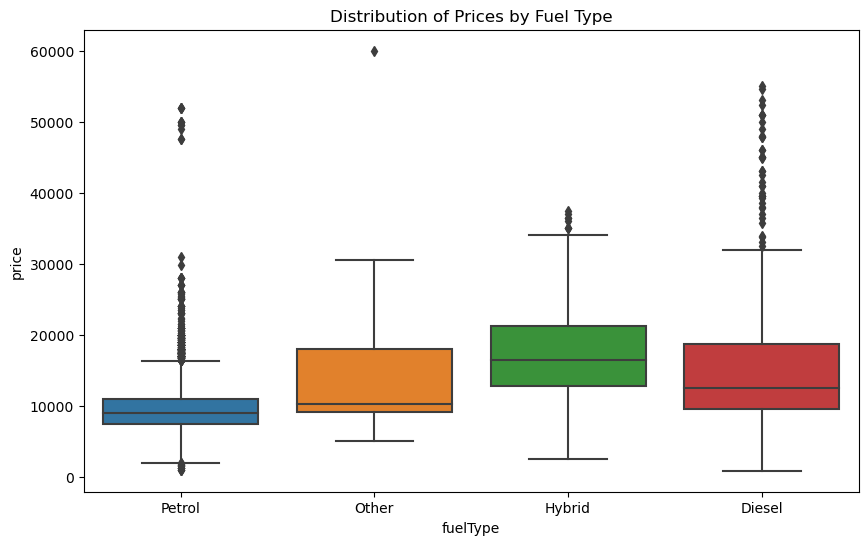

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(x='fuelType',y='price',data=df)
plt.title('Distribution of Prices by Fuel Type')
plt.show()

C:\Users\gulsa\AppData\Local\Temp\ipykernel_13732\3441226645.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


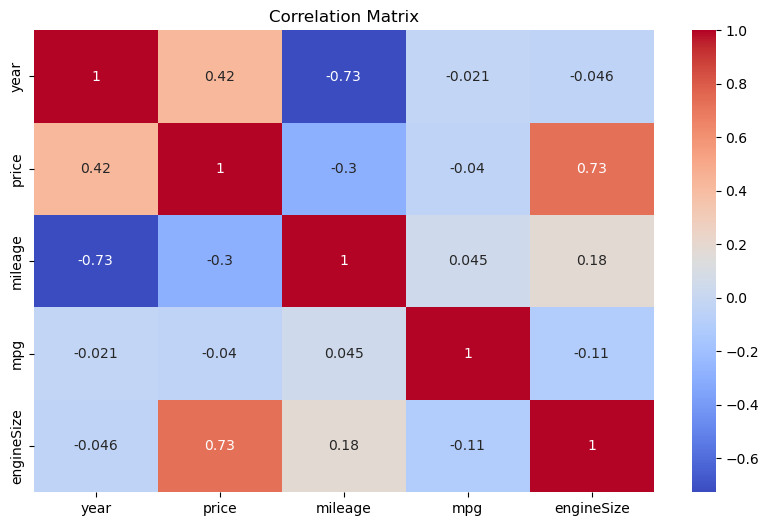

In [12]:
# Visualize the correlation between numerical variables
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

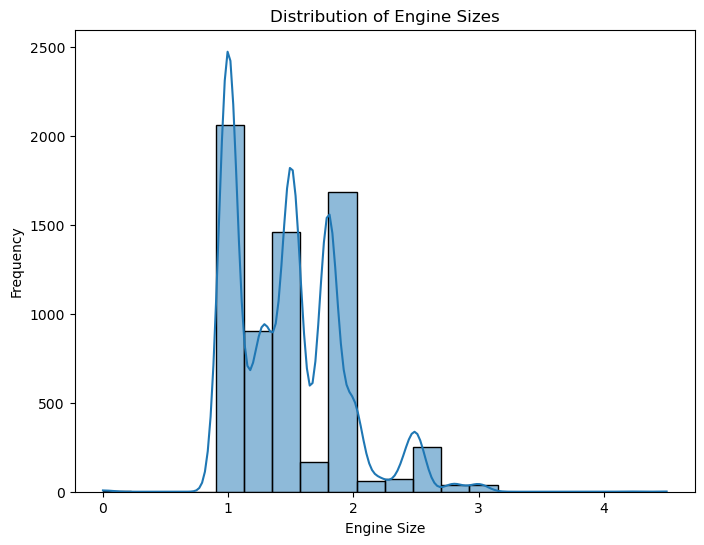

In [52]:
# Visualize the distribution of engine sizes
plt.figure(figsize=(8, 6))
sns.histplot(df['engineSize'], bins=20, kde=True)
plt.title('Distribution of Engine Sizes')
plt.xlabel('Engine Size')
plt.ylabel('Frequency')
plt.show()

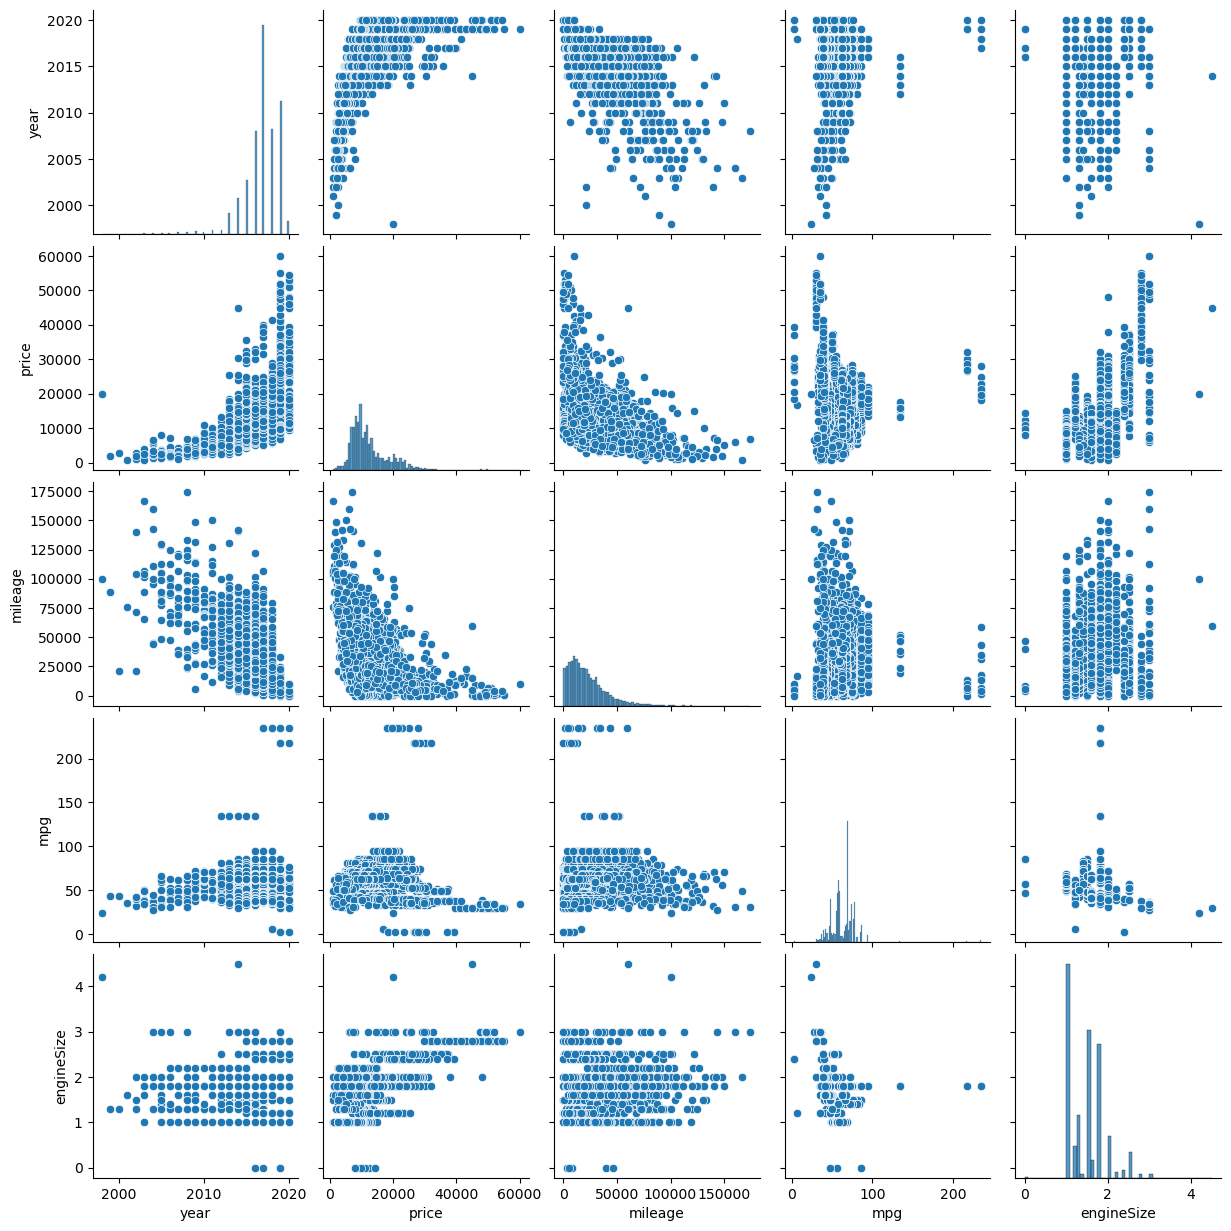

In [53]:
# Create a pair plot
sns.pairplot(df)

# Show the plot
plt.show()

### Splitting the DataSet

In [58]:
# Define the features (X) and the target variable (y)
X = df[['year', 'mileage', 'mpg', 'engineSize']]
y = df['price']

In [59]:
#Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Fitting the Model

In [60]:
# Initialize and train the machine learning model (linear regression)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Prediction on the Testing set

In [61]:
# Make predictions on the test data
y_pred= model.predict(X_test)

### Check the Results

In [62]:
# Evaluate the model 
mse= mean_squared_error(y_test, y_pred)
r2=r2_score(y_test,y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error: 9937441.756444892
R-squared (R2) Score: 0.7664870004800187


### Createing a XGBoost Model

In [63]:
# Create an XGBoost model
model = xgb.XGBRegressor(
    objective='reg:squarederror',  # 'reg:squarederror' for regression
    n_estimators=100,  # Number of boosting rounds (trees)
    learning_rate=0.1,  # Step size shrinkage to prevent overfitting
    max_depth=6,  # Maximum depth of each tree
    subsample=0.8,  # Fraction of samples used for fitting each tree
    colsample_bytree=0.8,  # Fraction of features used for fitting each tree
    random_state=42
)

In [64]:
# Train the model on the training data
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [65]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [66]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1569331.7724205502


In [67]:
# Define parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [68]:
# Create an XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

In [69]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=3, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=42, ...),
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='neg_mean_squared_error', verbose=1)

In [70]:
# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [71]:
# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test)

In [88]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Best Parameters: {best_params}")
print(f"Mean Squared Error: {mse}")

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300, 'subsample': 0.8}
Mean Squared Error: 1568505.9159652104


In [74]:
# Create a DataFrame with actual and predicted values
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [75]:
predictions_df

,Actual,Predicted
381,37440,31824.220703
2476,4159,3997.711426
2855,10600,11374.476562
2018,8995,10270.393555
2185,11000,10078.381836
...,...,...
4715,10800,9715.913086
5374,7495,7734.586426
1027,10790,10488.737305
2802,9991,8920.293945
